---

## Image API

### c) Generate Image

In [1]:
import httpx
import base64
from IPython.display import display, Image
from gai.persona.images.pydantic.GenerateImagePydantic import GenerateImagePydantic
url = "http://localhost:12033/api/v1/persona/image"
payload=GenerateImagePydantic(
    Name="Anna",
    AgentTraits=["Diligent","Humorous"],
    AgentImageStyles=["DSLR photo","8k uhd highly detailed"]
    )
payload=payload.dict()

async with httpx.AsyncClient() as client:
    response = await client.post(url, json=payload,timeout=60)
    if response.status_code == 200:
        response_json=response.json()
        image_data_url = response_json["data_url"]
        # Decode the base64 string to bytes
        header, encoded = image_data_url.split(",", 1)
        image_bytes = base64.b64decode(encoded)
        
        # Display the image in the Jupyter notebook
        display(Image(data=image_bytes))
    else:
        print(f"Error: {response.status_code}")


Error: 500


### d) Get Image

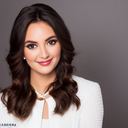

In [2]:
import httpx
import base64
from IPython.display import display, Image
from gai.persona.images.pydantic.GenerateImagePydantic import GenerateImagePydantic
url = "http://localhost:12033/api/v1/persona/image/128x128/00000000-0000-0000-0000-000000000000"

async with httpx.AsyncClient() as client:
    response = await client.get(url)
    if response.status_code == 200:
        response_json=response.json()
        image_data_url = response_json["data_url"]
        # Decode the base64 string to bytes
        header, encoded = image_data_url.split(",", 1)
        image_bytes = base64.b64decode(encoded)
        
        # Display the image in the Jupyter notebook
        display(Image(data=image_bytes))
    else:
        print(f"Error: {response.status_code}")
